In [121]:
import pickle
import os
import matplotlib.pyplot as plt

def load_environment_data():
    """
    Loads place cell, reward cell network data, and environment data, including vanilla and multiscale hmaps.

    Returns:
    - data (dict): A dictionary containing network data and environment variables.
    """
    data = {}
    world_name = "world0_20x20-obstacles"

    # Define directories for PKL and HMAPS
    network_dir = f"pkl/networks/{world_name}"
    hmaps_dir = f"pkl/hmaps/{world_name}"
    vanilla_path_dir = f"analysis/stats/vanilla/{world_name}/hmaps"
    multiscale_path_dir = f"analysis/stats/multiscale/{world_name}/hmaps"

    # Load small PCN
    try:
        with open(f"{network_dir}/pcn_small.pkl", "rb") as f:
            data["small_pc_net"] = pickle.load(f)
        print("Loaded small PCN.")
    except FileNotFoundError:
        print("Error: small PCN file not found.")
        return None

    # Load large PCN (if available)
    try:
        with open(f"{network_dir}/pcn_large.pkl", "rb") as f:
            data["large_pc_net"] = pickle.load(f)
        print("Loaded large PCN.")
        data["has_large_pcn"] = True
    except FileNotFoundError:
        print("Large PCN file not found. Assuming single-scale setup.")
        data["has_large_pcn"] = False

    # Load small RCN
    try:
        with open(f"{network_dir}/rcn_small.pkl", "rb") as f:
            data["rc_net_small"] = pickle.load(f)
        print("Loaded small RCN.")
    except FileNotFoundError:
        print("Error: small RCN file not found.")
        data["rc_net_small"] = None

    # Load large RCN (if applicable)
    if data.get("has_large_pcn", False):
        try:
            with open(f"{network_dir}/rcn_large.pkl", "rb") as f:
                data["rc_net_large"] = pickle.load(f)
            print("Loaded large RCN.")
        except FileNotFoundError:
            print("Large RCN file not found. Assuming single-scale setup.")
            data["rc_net_large"] = None

    # Load vanilla hmaps
    data["vanilla_hmaps"] = {}
    if os.path.exists(vanilla_path_dir):
        for file_name in os.listdir(vanilla_path_dir):
            if "hmap_x" in file_name or "hmap_y" in file_name:
                # Parse trial and corner information from filename
                parts = file_name.split('_')
                if len(parts) >= 6:  # Ensure filename has enough parts
                    trial_id = parts[1]
                    corner_x = parts[3]
                    corner_y = parts[4]
                    corner_id = f"{corner_x}_{corner_y}"
                    
                    # Initialize nested dictionaries if they don't exist
                    if corner_id not in data["vanilla_hmaps"]:
                        data["vanilla_hmaps"][corner_id] = {}
                    if trial_id not in data["vanilla_hmaps"][corner_id]:
                        data["vanilla_hmaps"][corner_id][trial_id] = {}
                    
                    # Load the hmap
                    with open(os.path.join(vanilla_path_dir, file_name), "rb") as f:
                        if "hmap_x" in file_name:
                            data["vanilla_hmaps"][corner_id][trial_id]["hmap_x"] = pickle.load(f)
                        elif "hmap_y" in file_name:
                            data["vanilla_hmaps"][corner_id][trial_id]["hmap_y"] = pickle.load(f)
        print("Loaded vanilla path hmaps.")

    # Load multiscale hmaps
    data["multiscale_hmaps"] = {}
    if os.path.exists(multiscale_path_dir):
        for file_name in os.listdir(multiscale_path_dir):
            if "hmap_x" in file_name or "hmap_y" in file_name:
                # Parse trial and corner information from filename
                parts = file_name.split('_')
                if len(parts) >= 6:  # Ensure filename has enough parts
                    trial_id = parts[1]
                    corner_x = parts[3]
                    corner_y = parts[4]
                    corner_id = f"{corner_x}_{corner_y}"
                    
                    # Initialize nested dictionaries if they don't exist
                    if corner_id not in data["multiscale_hmaps"]:
                        data["multiscale_hmaps"][corner_id] = {}
                    if trial_id not in data["multiscale_hmaps"][corner_id]:
                        data["multiscale_hmaps"][corner_id][trial_id] = {}
                    
                    # Load the hmap
                    with open(os.path.join(multiscale_path_dir, file_name), "rb") as f:
                        if "hmap_x" in file_name:
                            data["multiscale_hmaps"][corner_id][trial_id]["hmap_x"] = pickle.load(f)
                        elif "hmap_y" in file_name:
                            data["multiscale_hmaps"][corner_id][trial_id]["hmap_y"] = pickle.load(f)
        print("Loaded multiscale path hmaps.")

    # Load environment data
    environment_files = {
        "hmap_x": f"{hmaps_dir}/hmap_x.pkl",
        "hmap_y": f"{hmaps_dir}/hmap_y.pkl",
        "hmap_g": f"{hmaps_dir}/hmap_g.pkl",
        "hmap_vis_density": f"{hmaps_dir}/hmap_vis_density.pkl",
        "hmap_z_small": f"{hmaps_dir}/hmap_z_small.pkl",
    }

    for key, filepath in environment_files.items():
        try:
            with open(filepath, "rb") as f:
                data[key] = pickle.load(f)
            print(f"Loaded {key}.")
        except FileNotFoundError:
            print(f"Error: {filepath} not found.")
            return None

    # Load large-scale place cell activations (if applicable)
    if data.get("has_large_pcn", False):
        try:
            with open(f"{hmaps_dir}/hmap_z_large.pkl", "rb") as f:
                data["hmap_z_large"] = pickle.load(f)
            print("Loaded hmap_z_large.")
        except FileNotFoundError:
            print("hmap_z_large file not found. Assuming single-scale setup.")
            data["hmap_z_large"] = None

    # Set goal properties
    data["goal_r"] = 0.8  # Goal radius
    data["goal_location"] = [-7, 7]  # Goal location

    return data

data = load_environment_data()

Loaded small PCN.
Loaded large PCN.
Loaded small RCN.
Loaded large RCN.
Loaded hmap_x.
Loaded hmap_y.
Loaded hmap_g.
Loaded hmap_vis_density.
Loaded hmap_z_small.
Loaded hmap_z_large.


In [122]:
import os

# def save_plot(fig, scale, plot_type, world_id):
#     """
#     Saves a plot to the appropriate directory based on the scale.

#     Parameters:
#     - fig: The matplotlib figure to save.
#     - scale (str): Either 'vanilla' or 'multiscale'.
#     - plot_type (str): A descriptive name for the plot (e.g., 'rcn_activation', 'vis_density').
#     - world_id (int): The world identifier to differentiate plots.
#     """
#     base_dir = os.path.join("analysis", "plots")
#     sub_dir = "multiscale" if scale == "multiscale" else "vanilla"
#     directory = os.path.join(base_dir, sub_dir, f"{world_id}")

#     # Create directory if it does not exist
#     os.makedirs(directory, exist_ok=True)

#     # Construct the file path and save the figure
#     filepath = os.path.join(directory, f"{plot_type}.png")
#     fig.savefig(filepath, dpi=300)
#     print(f"Saved plot to {filepath}")

In [123]:
import numpy as np
from matplotlib.cm import get_cmap

def probeOne(probed, layer, data, world_id):
    """Updated to save the plot after visualizing."""
    hmap_x = data['hmap_x']
    hmap_y = data['hmap_y']
    cmap = get_cmap("plasma")

    if layer == "small":
        activations = data['hmap_z_small'][:, probed]
        title = f"Place Cell {probed} Activation (Small Layer)"
        scale = "vanilla"
    elif layer == "large":
        if not data.get('has_large_pcn', False):
            print("Large layer not available. Skipping visualization.")
            return
        activations = data['hmap_z_large'][:, probed]
        title = f"Place Cell {probed} Activation (Large Layer)"
        scale = "multiscale"
    else:
        raise ValueError("Layer must be either 'small' or 'large'.")

    # Plot the activations
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect("equal")

    # Create a hexbin plot for place cell activations
    cntr = ax.hexbin(hmap_x, hmap_y, activations, gridsize=50, cmap=cmap, alpha=0.6)

    # Add colorbar and title
    plt.colorbar(cntr)
    plt.title(title)

    plt.show()


# # Calculate the total activation for the small layer
# total_activations_small = np.sum(data['hmap_z_small'], axis=0)
# top_cells_small = np.argsort(total_activations_small)[-10:]

# # Visualize the top 10 cells in the small layer
# for cell in top_cells_small:
#     probeOne(cell, "small", data, "world5")

# # Calculate and visualize the large layer only if it exists
# if data.get('has_large_pcn', False) and data.get('hmap_z_large') is not None:
#     total_activations_large = np.sum(data['hmap_z_large'], axis=0)
#     top_cells_large = np.argsort(total_activations_large)[-10:]
#     for cell in top_cells_large:
#         probeOne(cell, "large", data, "world5")
# else:
#     print("Large layer not available. Skipping large-scale visualizations.")


C:\Users\bduke\AppData\Local\Temp\ipykernel_18900\2260019377.py:34: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



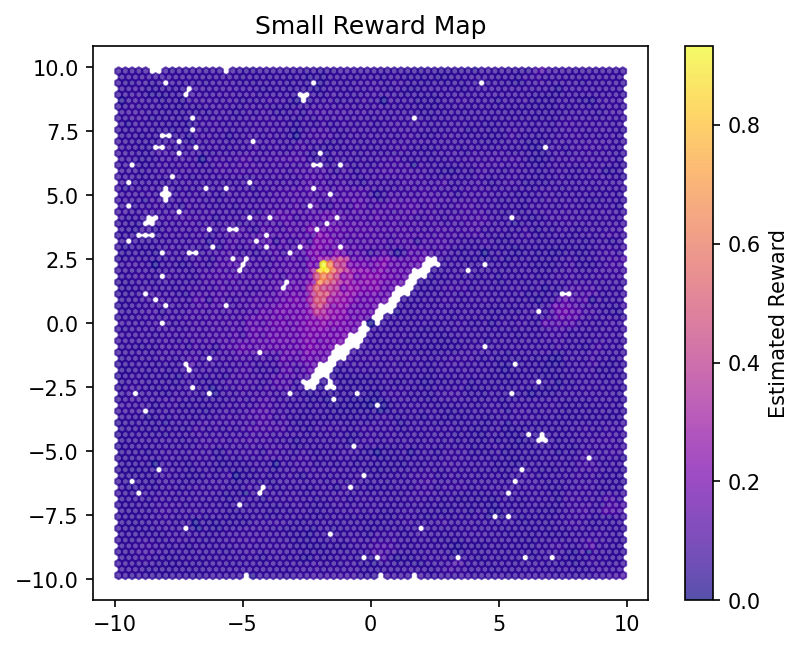

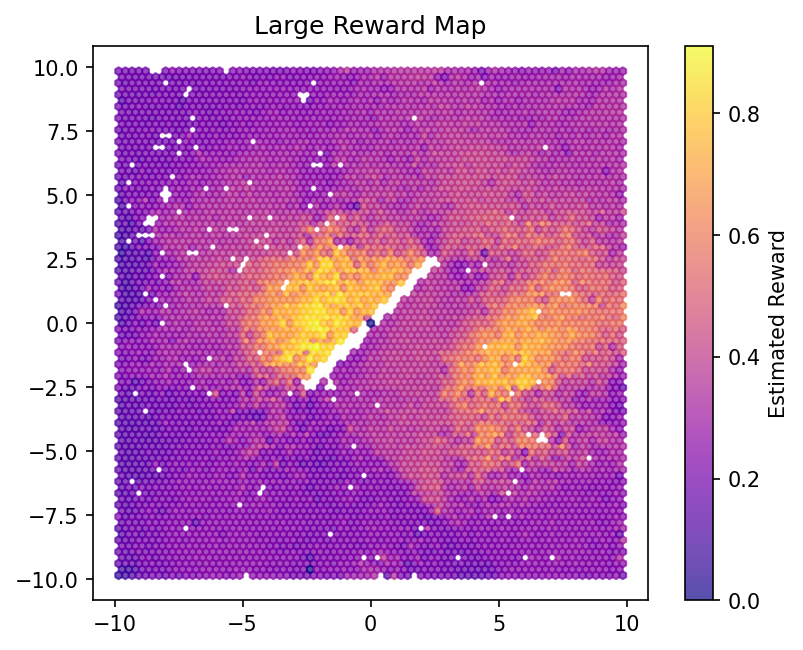

In [124]:
from matplotlib.cm import get_cmap
import tensorflow as tf
import numpy as np

def plot_rcn_activation(scale='small', world_id="unspecified_world"):
    """Updated to save the plot after visualizing."""
    if scale == 'small':
        rc_net = data.get('rc_net_small', None)
        hmap_z = data['hmap_z_small']
        scale_dir = "vanilla"
    elif scale == 'large':
        rc_net = data.get('rc_net_large', None)
        hmap_z = data.get('hmap_z_large', None)
        scale_dir = "multiscale"
    else:
        raise ValueError("Scale must be either 'small' or 'large'.")

    if rc_net is None:
        print(f"Could not find RCN data for the '{scale}' scale.")
        return

    if hmap_z is None:
        print(f"Could not find activation data for the '{scale}' scale.")
        return

    hmap_x = data['hmap_x']
    hmap_y = data['hmap_y']
    goal_location = data['goal_location']
    goal_r = data['goal_r']

    reward_cell_index = 0
    gridsize = 75

    cmap = get_cmap("plasma")
    hmap_z_tf = tf.cast(hmap_z, tf.float32)
    w_in_effective = rc_net.w_in_effective[reward_cell_index]
    sum_activations = tf.reduce_sum(hmap_z_tf, axis=1)
    safe_denominator = tf.where(sum_activations > 0, sum_activations, 1.0)
    safe_denominator = tf.cast(safe_denominator, tf.float32)
    hmap_z_t = tf.transpose(hmap_z_tf)
    reward_function = tf.tensordot(w_in_effective, hmap_z_t, axes=1)
    reward_function /= safe_denominator
    reward_function = tf.squeeze(reward_function)

    if reward_function.shape[0] != hmap_x.shape[0]:
        raise ValueError(f"Shape mismatch: reward_function has shape {reward_function.shape}, "
                         f"but expected {hmap_x.shape} based on hmap_x.")
    
    reward_function_np = reward_function.numpy()

    if reward_function_np.ndim == 1:
        # 1D reward function
        grad_x = np.gradient(reward_function_np)
        grad_y = np.zeros_like(grad_x)
    elif reward_function_np.ndim == 2:
        # 2D reward function
        grad_x, grad_y = np.gradient(reward_function_np)
    else:
        raise ValueError(f"Unsupported reward_function dimensions: {reward_function_np.ndim}")


    fig, ax = plt.subplots(dpi=150)
    ax.set_aspect('equal')
    cntr = ax.hexbin(hmap_x, hmap_y, reward_function.numpy(), gridsize=gridsize, cmap=cmap, alpha=0.7)

    # goal_circle = plt.Circle(goal_location, goal_r, color='green', alpha=0.5, fill=True)
    # ax.add_patch(goal_circle)

    cbar = fig.colorbar(cntr, ax=ax)
    cbar.set_label("Estimated Reward")
    plt.title(f"{scale.capitalize()} Reward Map")

    plt.show()

# # Hardcoded function calls
plot_rcn_activation(scale='small', world_id="world0_20x20")
plot_rcn_activation(scale='large', world_id="world0_20x20")


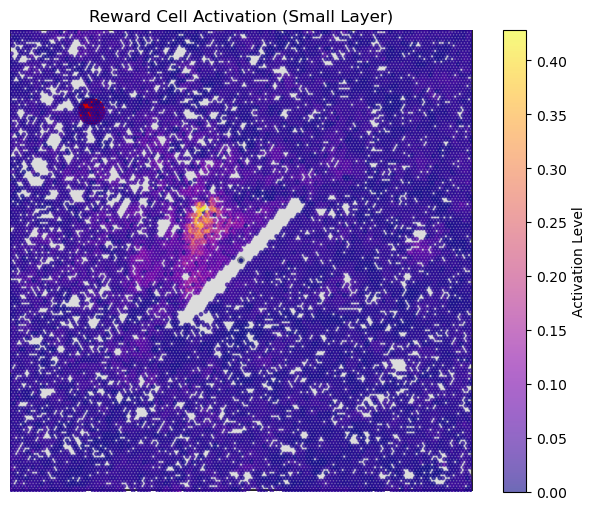

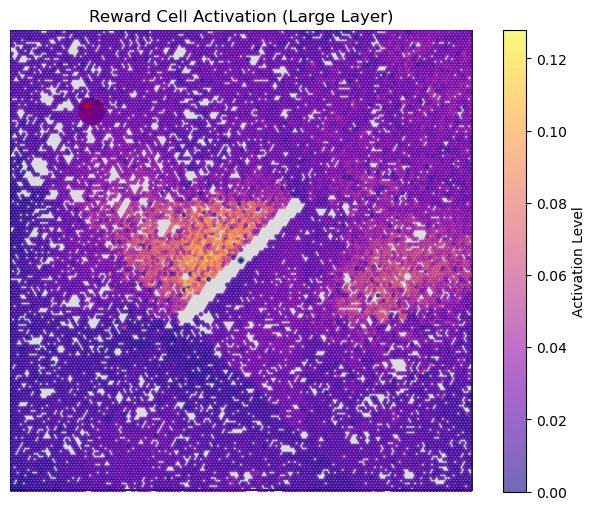

In [125]:
import matplotlib.image as mpimg
from PIL import Image

def plot_rcn_activations_with_background(reward_cell_index, layer, data, world_id, background_path, rotation_angle=0):
    """
    Plots RCN activations over the hmap_x and hmap_y grid and superimposes the plot on a rotated background PNG.
    
    Args:
    - reward_cell_index (int): The index of the reward cell to visualize.
    - layer (str): The layer to visualize ('small' or 'large').
    - data (dict): The dictionary containing loaded environment and network data.
    - world_id (str): Identifier for the current world/environment.
    - background_path (str): Path to the PNG file to use as the background.
    - rotation_angle (float): The angle to rotate the background image (in degrees).
    """
    hmap_x = data['hmap_x']
    hmap_y = data['hmap_y']
    cmap = plt.colormaps.get_cmap("plasma")

    if layer == "small":
        rc_net = data.get("rc_net_small")
        hmap_z = data['hmap_z_small']
        scale = "vanilla"
    elif layer == "large":
        if not data.get('has_large_pcn', False):
            print("Large layer not available. Skipping visualization.")
            return
        rc_net = data.get("rc_net_large")
        hmap_z = data.get("hmap_z_large")
        scale = "multiscale"
    else:
        raise ValueError("Layer must be either 'small' or 'large'.")

    if rc_net is None:
        print(f"No RCN data found for layer: {layer}")
        return

    # Compute reward function using RCN weights and activations
    hmap_z_tf = tf.cast(hmap_z, tf.float32)
    w_in_effective = tf.cast(rc_net.w_in_effective[reward_cell_index], tf.float32)

    # Adjust w_in_effective to match hmap_z_tf
    if w_in_effective.shape[0] != hmap_z_tf.shape[1]:
        print(f"Adjusting w_in_effective shape: {w_in_effective.shape} -> {hmap_z_tf.shape[1]}")
        w_in_effective = w_in_effective[:hmap_z_tf.shape[1]]

    # Compute reward function
    reward_function = tf.tensordot(w_in_effective, tf.transpose(hmap_z_tf), axes=1)
    reward_function = tf.squeeze(reward_function).numpy()

    # Load and rotate the background image
    img = Image.open(background_path)
    img = img.rotate(rotation_angle, expand=True)
    img = np.array(img)

    # Plot the activations
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(img, extent=[hmap_x.min(), hmap_x.max(), hmap_y.min(), hmap_y.max()], aspect='auto')
    ax.set_aspect("equal")

    # Create a hexbin plot for RCN activations
    cntr = ax.hexbin(hmap_x, hmap_y, reward_function, gridsize=150, cmap=cmap, alpha=0.6)

    # Add colorbar and title
    cbar = plt.colorbar(cntr, ax=ax)
    cbar.set_label("Activation Level")
    plt.title(f"Reward Cell Activation ({layer.capitalize()} Layer)")

    # Remove the plot frame
    ax.set_axis_off()

    # Display the plot
    plt.show()

# Example usage
background_path = "visualizations/environment_images/world0_20x20.png"
plot_rcn_activations_with_background(
    reward_cell_index=0,
    layer="small",
    data=data,
    world_id="world0_20x20",
    background_path=background_path,
    rotation_angle=270
)
plot_rcn_activations_with_background(
    reward_cell_index=0,
    layer="large",
    data=data,
    world_id="world0_20x20",
    background_path=background_path,
    rotation_angle=270
)


In [126]:
import plotly.graph_objects as go
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter

def plot_rcn_gradient_3d_interactive(scale='blended', world_id="unspecified_world", smoothing_sigma=0):
    """Plots the gradient of the RCN activation map in 3D interactively using Plotly.
    
    For `scale='blended'`, combines small and large scales using gradient-based blending.
    """
    print(f"Starting plot_rcn_gradient_3d_interactive for scale: {scale}, world_id: {world_id}")

    # Select appropriate scales
    if scale in ['small', 'large']:
        rc_net = data.get(f'rc_net_{scale}', None)
        hmap_z = data.get(f'hmap_z_{scale}', None)
        if scale == 'small':
            scale_dir = "vanilla"
        else:
            scale_dir = "multiscale"
    elif scale == 'blended':
        rc_net_small = data.get('rc_net_small', None)
        hmap_z_small = data.get('hmap_z_small', None)
        rc_net_large = data.get('rc_net_large', None)
        hmap_z_large = data.get('hmap_z_large', None)
        if rc_net_small is None or hmap_z_small is None or rc_net_large is None or hmap_z_large is None:
            print("Missing data for blended scale. Ensure both small and large scale data are provided.")
            return
    else:
        raise ValueError("Scale must be 'small', 'large', or 'blended'.")

    # Ensure data is loaded
    if scale in ['small', 'large']:
        if rc_net is None or hmap_z is None:
            print(f"Could not find RCN or activation data for the '{scale}' scale.")
            return

    print("RCN data and activation maps loaded successfully.")

    # Calculate reward function for small and large scales
    def compute_reward_function(rc_net, hmap_z):
        hmap_x = np.array(data['hmap_x'])
        hmap_y = np.array(data['hmap_y'])
        reward_cell_index = 0
        hmap_z_tf = tf.cast(hmap_z, tf.float32)
        w_in_effective = rc_net.w_in_effective[reward_cell_index]
        sum_activations = tf.reduce_sum(hmap_z_tf, axis=1)
        safe_denominator = tf.where(sum_activations > 0, sum_activations, 1.0)
        safe_denominator = tf.cast(safe_denominator, tf.float32)
        hmap_z_t = tf.transpose(hmap_z_tf)
        reward_function = tf.tensordot(w_in_effective, hmap_z_t, axes=1)
        reward_function /= safe_denominator
        reward_function = tf.squeeze(reward_function).numpy()
        return reward_function, hmap_x, hmap_y

    if scale == 'blended':
        reward_function_small, hmap_x_small, hmap_y_small = compute_reward_function(rc_net_small, hmap_z_small)
        reward_function_large, hmap_x_large, hmap_y_large = compute_reward_function(rc_net_large, hmap_z_large)

        # Compute gradients for blending
        grad_small = np.sum(np.abs(np.gradient(reward_function_small)))
        grad_large = np.sum(np.abs(np.gradient(reward_function_large)))
        alpha = grad_small / (grad_small + grad_large + 1e-6)

        print(f"Blending scales with alpha={alpha:.2f} (small scale weight).")

        # Blend the reward functions
        reward_function_blended = alpha * reward_function_small + (1 - alpha) * reward_function_large

        # Use coordinates from small scale for interpolation
        hmap_x = hmap_x_small
        hmap_y = hmap_y_small
        reward_function = reward_function_blended
    else:
        reward_function, hmap_x, hmap_y = compute_reward_function(rc_net, hmap_z)

    # Ensure valid data points for interpolation
    valid_mask = ~np.isnan(reward_function)
    hmap_x_valid = hmap_x[valid_mask]
    hmap_y_valid = hmap_y[valid_mask]
    reward_function_valid = reward_function[valid_mask]

    if len(hmap_x_valid) < 3 or len(hmap_y_valid) < 3:
        print("Insufficient valid data points for interpolation. Exiting.")
        return

    # Reshape to a grid
    grid_x, grid_y = np.linspace(hmap_x.min(), hmap_x.max(), 100), np.linspace(hmap_y.min(), hmap_y.max(), 100)
    grid_x, grid_y = np.meshgrid(grid_x, grid_y)
    reward_function_grid = griddata(
        (hmap_x_valid, hmap_y_valid), reward_function_valid, (grid_x, grid_y), method='cubic'
    )

    if reward_function_grid is None or np.isnan(reward_function_grid).all():
        print("Interpolated reward function contains NaN values or failed.")
        return

    print("Interpolated reward function to 2D grid successfully.")

    # Fill NaN values with nearest neighbor interpolation as a fallback
    reward_function_grid = np.nan_to_num(reward_function_grid, nan=np.nanmean(reward_function_valid))

    # Apply Gaussian smoothing
    reward_function_grid_smoothed = gaussian_filter(reward_function_grid, sigma=smoothing_sigma)
    print("Applied Gaussian smoothing to reward function grid.")

    # Plot the 3D surface interactively using Plotly
    fig = go.Figure()

    fig.add_trace(go.Surface(
        z=reward_function_grid_smoothed,
        x=grid_x,
        y=grid_y,
        colorscale="Viridis",
        showscale=True,
    ))

    # Update layout for better interactivity
    fig.update_layout(
        title=f"{scale.capitalize()} Gradient Map in 3D (Smoothed)",
        scene=dict(
            xaxis_title="X Coordinate",
            yaxis_title="Y Coordinate",
            zaxis_title="Reward Value",
        ),
        margin=dict(l=0, r=0, t=50, b=0),
    )

    # Display the plot
    fig.show()
    print("Interactive 3D Gradient plot displayed successfully.")


# Example calls
plot_rcn_gradient_3d_interactive(scale='small', world_id="world20x20", smoothing_sigma=2)
plot_rcn_gradient_3d_interactive(scale='large', world_id="world20x20", smoothing_sigma=2)
plot_rcn_gradient_3d_interactive(scale='blended', world_id="world20x20", smoothing_sigma=2)


Starting plot_rcn_gradient_3d_interactive for scale: small, world_id: world20x20
RCN data and activation maps loaded successfully.
Interpolated reward function to 2D grid successfully.
Applied Gaussian smoothing to reward function grid.


Interactive 3D Gradient plot displayed successfully.
Starting plot_rcn_gradient_3d_interactive for scale: large, world_id: world20x20
RCN data and activation maps loaded successfully.
Interpolated reward function to 2D grid successfully.
Applied Gaussian smoothing to reward function grid.


Interactive 3D Gradient plot displayed successfully.
Starting plot_rcn_gradient_3d_interactive for scale: blended, world_id: world20x20
RCN data and activation maps loaded successfully.
Blending scales with alpha=0.25 (small scale weight).
Interpolated reward function to 2D grid successfully.
Applied Gaussian smoothing to reward function grid.


Interactive 3D Gradient plot displayed successfully.


In [127]:
cmap = get_cmap("plasma")

def plot_vis_density(data, world_id="unspecified_world"):
    """Updated to save the plot after visualizing."""
    hmap_x = data['hmap_x']
    hmap_y = data['hmap_y']
    hmap_vis_density = data['hmap_vis_density']

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_aspect("equal")
    ax.set_title("Visual Density Map")
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")

    hb = ax.hexbin(
        hmap_x, hmap_y, hmap_vis_density, gridsize=50, cmap=cmap, reduce_C_function=np.mean, alpha=0.8
    )

    cb = plt.colorbar(hb, ax=ax)
    cb.set_label("Visual Density")

    # Save the plot
    save_plot(fig, "vanilla", "vis_density", world_id)

    plt.show()

# plot_vis_density(data, world_id="world3_10x10")

C:\Users\bduke\AppData\Local\Temp\ipykernel_18900\358806467.py:1: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [128]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def plot_corner_heatmaps(data, path_type="multiscale", world_id="world0_20x20", bins=100):
    """
    Plot heatmaps showing path density for each corner in the environment.
    
    Parameters:
    - data: Dictionary containing path data
    - path_type: Either "vanilla" or "multiscale"
    - world_id: ID of the world being plotted
    - bins: Number of bins for the 2D histogram
    """
    paths_data = data["vanilla_hmaps"] if path_type == "vanilla" else data["multiscale_hmaps"]
    
    corners = list(paths_data.keys())  # Get available corners
    num_corners = len(corners)
    goal_location = data['goal_location']
    goal_r = data['goal_r']
    
    # Determine subplot grid based on the number of corners
    fig, axs = plt.subplots(1, num_corners, figsize=(15, 5))  # Single row layout
    if num_corners == 1:
        axs = [axs]  # Ensure axs is iterable for single subplot

    # Process each corner
    for ax, corner_id in zip(axs, corners):
        corner_x, corner_y = map(int, corner_id.split('_'))
        
        # Collect all path points for this corner
        all_x = []
        all_y = []
        for trial_id, hmaps in paths_data[corner_id].items():
            all_x.extend(hmaps["hmap_x"][1:])  # Skip first point
            all_y.extend(hmaps["hmap_y"][1:])
        
        # Create heatmap using 2D histogram
        heatmap, xedges, yedges = np.histogram2d(
            all_x, all_y, 
            bins=bins, 
            range=[[-10, 10], [-10, 10]]
        )
        
        # Plot heatmap
        im = ax.imshow(
            heatmap.T,
            extent=[-10, 10, -10, 10],
            origin='lower',
            cmap='viridis',
            aspect='equal',
            interpolation='nearest'
        )
        
        # Add boundary rectangle
        ax.add_patch(Rectangle((-10, -10), 20, 20, fill=False, color='gray', alpha=0.5))
        

        goal_circle = plt.Circle(goal_location, goal_r, color='green', alpha=1, fill=True)
        ax.add_patch(goal_circle)
        
        # Customize subplot
        ax.set_xlim(-10, 10)
        ax.set_ylim(-10, 10)
        ax.set_title(f'Corner ({corner_x}, {corner_y})')
        
        # Add colorbar
        plt.colorbar(im, ax=ax, label='Path Density')
    
    # Overall plot settings
    fig.suptitle(f'{"Vanilla" if path_type == "vanilla" else "Multiscale"} Path Density - {world_id}', 
                 fontsize=16)
    
    # Adjust layout
    plt.tight_layout()
    
    plt.show()

# Example usage:
# For multiscale heatmaps
# plot_corner_heatmaps(data, path_type="multiscale")
# plot_corner_heatmaps(data, path_type="vanilla")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


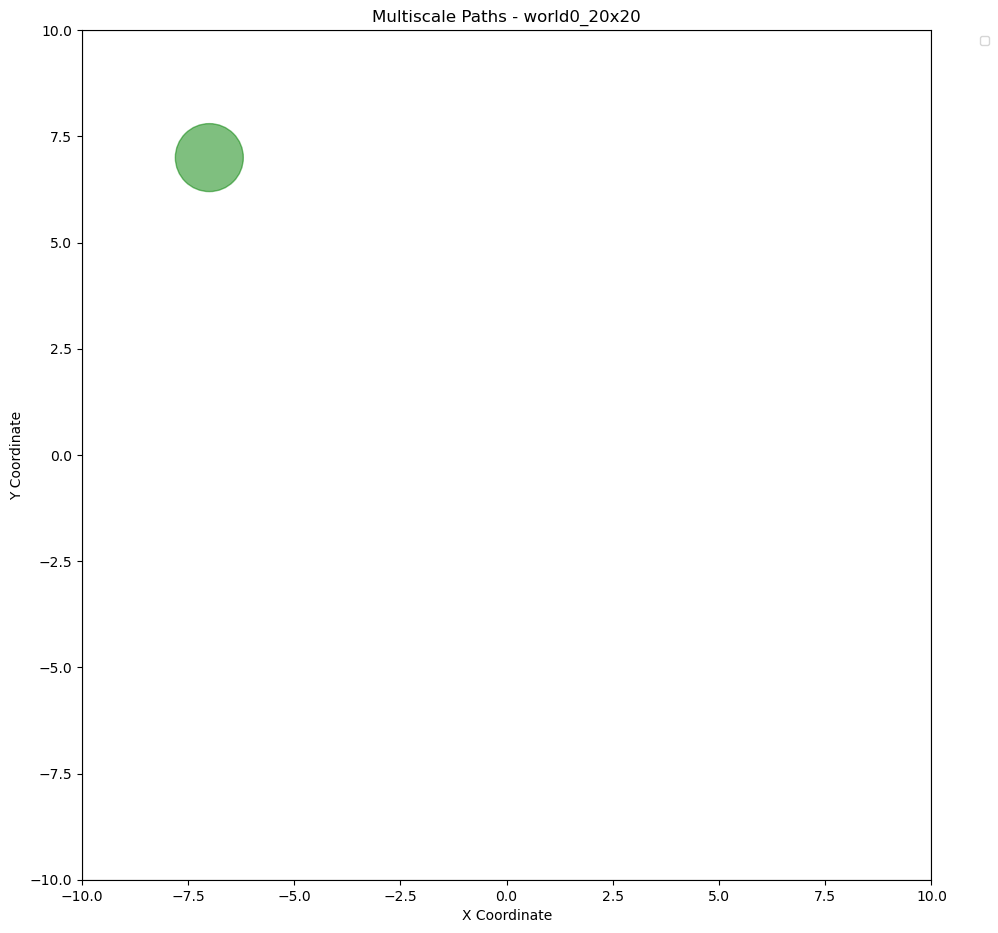

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


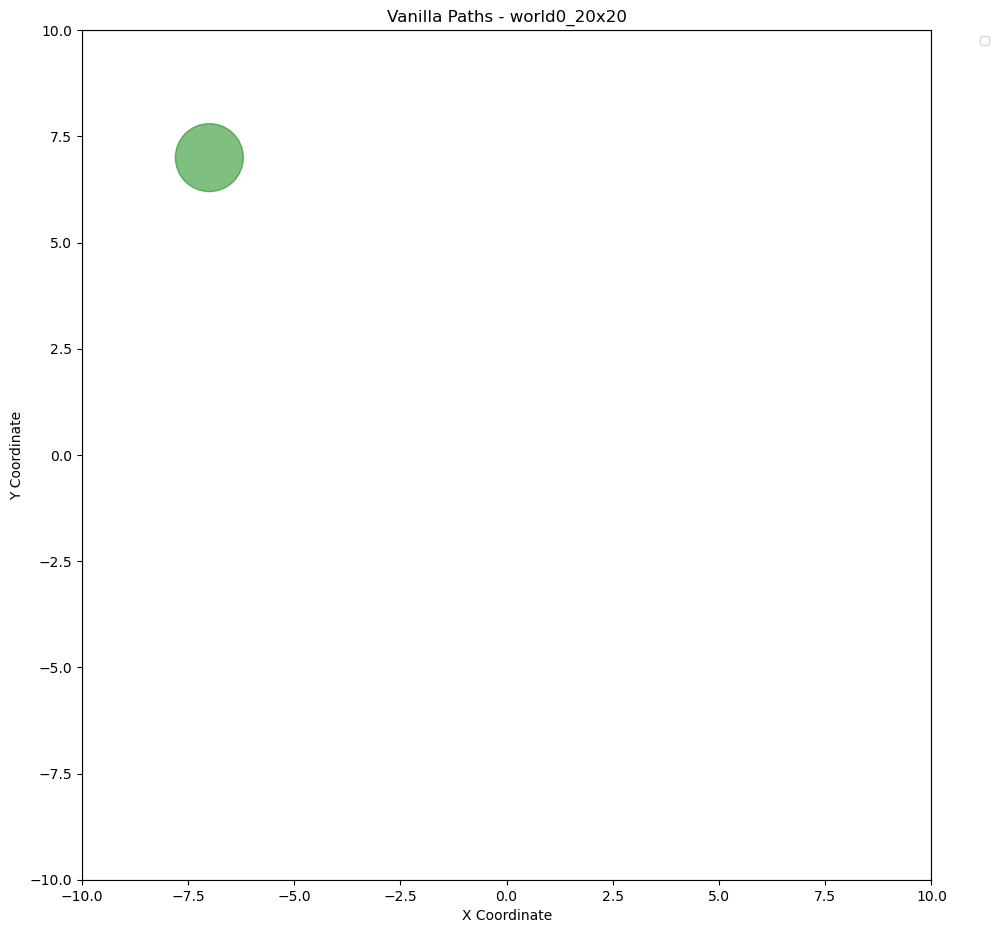

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.patches import Rectangle

def plot_paths(data, path_type="multiscale", world_id="world0_20x20"):
    """
    Plot paths from either vanilla or multiscale hmaps within a 20x20 grid.
    
    Parameters:
    - data: Dictionary containing path data
    - path_type: Either "vanilla" or "multiscale"
    - world_id: ID of the world being plotted
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_aspect('equal')
    
    # Set up the 20x20 grid
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    
    # Plot single outer boundary
    ax.add_patch(Rectangle((-10, -10), 20, 20, fill=False, color='gray', alpha=0.5))
    
    # Different colors for different trials
    colors = plt.cm.tab10(np.linspace(0, 1, 10))
    
    # Select the appropriate data source
    paths_data = data["vanilla_hmaps"] if path_type == "vanilla" else data["multiscale_hmaps"]
    
    # Plot paths for each corner and trial
    for corner_id, trials in paths_data.items():
        corner_x, corner_y = map(int, corner_id.split('_'))
        
        for trial_id, hmaps in trials.items():
            color = colors[int(trial_id) % len(colors)]
            
            # Get the path coordinates (excluding first point)
            x_coords = hmaps["hmap_x"][1:]
            y_coords = hmaps["hmap_y"][1:]
            
            # Plot the path
            ax.plot(x_coords, y_coords, '-', color=color, alpha=0.7, 
                   label=f'Trial {trial_id} (Corner {corner_x}, {corner_y})')
            
            # Mark start and end points
            ax.plot(x_coords[0], y_coords[0], 'o', color=color, markersize=8)
            ax.plot(x_coords[-1], y_coords[-1], 's', color=color, markersize=8)
    
    ax.set_title(f'{"Vanilla" if path_type == "vanilla" else "Multiscale"} Paths - {world_id}')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    
    # Add legend with smaller font size
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    ax.add_patch(plt.Circle(data['goal_location'], data['goal_r'], color='green', alpha=0.5, fill=True))
    
    # Adjust layout to prevent legend cutoff
    plt.tight_layout()
    
    # Save the plot if save_plot function is defined
    try:
        save_plot(fig, path_type, "paths", world_id)
    except NameError:
        plt.savefig(f'{path_type}_paths_{world_id}.png', bbox_inches='tight', dpi=300)
    
    plt.show()

# Example usage:
# For multiscale paths
plot_paths(data, path_type="multiscale")

# For vanilla paths
plot_paths(data, path_type="vanilla")